In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import gridspec
import h5py
from scipy.interpolate import RegularGridInterpolator as rgi

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.handlelength']=2
mpl.rcParams['legend.fontsize']=16
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16
mpl.rcParams['legend.labelspacing'] = 0.1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.direction'] = 'inout'

In [2]:
def read_data(base):
    file = open(base+".xg",'r')
    data = {}
    cont = True
    while (cont):
        line = file.readline()
        if line=='':
            cont = False
            continue
        time = line[11:]
        data[time] = {}
        rad = np.zeros(650)
        value = np.zeros(650)
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
        for i in range(650):
            line = file.readline().split()
            rad[i] = float(line[0])
            value[i] = float(line[1])

        data[time]["rad"] = rad
        data[time]["value"] = value
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
    return data

In [3]:
fulldata = {}
base = "../data/"
values = ['rho','temperature','ye']
for value in values:
    fulldata[value] = read_data(base+value)
    
for time in fulldata[values[0]]:
    lasttime=time

In [4]:
EOSfile="../data/LS220.h5"
EOS = h5py.File(EOSfile,'r')
logtemps = EOS['logtemp']
logrhos = EOS['logrho']
yes = EOS['ye']
table_abar = EOS['Abar'][:,:,:]
table_zbar = EOS['Zbar'][:,:,:]
table_xh = EOS['Xh'][:,:,:]
table_xp = EOS['Xp'][:,:,:]
table_xa = EOS['Xa'][:,:,:]
table_xn = EOS['Xn'][:,:,:]
mif_abar = rgi((yes,logtemps,logrhos), table_abar)
mif_zbar = rgi((yes,logtemps,logrhos), table_zbar)
mif_xh = rgi((yes,logtemps,logrhos), table_xh)
mif_xp = rgi((yes,logtemps,logrhos), table_xp)
mif_xa = rgi((yes,logtemps,logrhos), table_xa)
mif_xn = rgi((yes,logtemps,logrhos), table_xn)

In [5]:
lastrad = fulldata['rho'][lasttime]['rad']
lastrho = fulldata['rho'][lasttime]['value']
lasttemp = fulldata['temperature'][lasttime]['value']
lastye = fulldata['ye'][lasttime]['value']
lastabar = np.zeros(len(lastrad))
lastzbar = np.zeros(len(lastrad))
lastxh = np.zeros(len(lastrad))
lastxp = np.zeros(len(lastrad))
lastxa = np.zeros(len(lastrad))
lastxn = np.zeros(len(lastrad))

for i in range(len(lastrad)):
    lastabar[i] = mif_abar(np.array([lastye[i],np.log10(lasttemp[i]),np.log10(lastrho[i])]).T)[0]
    lastzbar[i] = mif_zbar(np.array([lastye[i],np.log10(lasttemp[i]),np.log10(lastrho[i])]).T)[0]
    lastxh[i] = mif_xh(np.array([lastye[i],np.log10(lasttemp[i]),np.log10(lastrho[i])]).T)[0]
    lastxp[i] = mif_xp(np.array([lastye[i],np.log10(lasttemp[i]),np.log10(lastrho[i])]).T)[0]
    lastxa[i] = mif_xa(np.array([lastye[i],np.log10(lasttemp[i]),np.log10(lastrho[i])]).T)[0]
    lastxn[i] = mif_xn(np.array([lastye[i],np.log10(lasttemp[i]),np.log10(lastrho[i])]).T)[0]

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


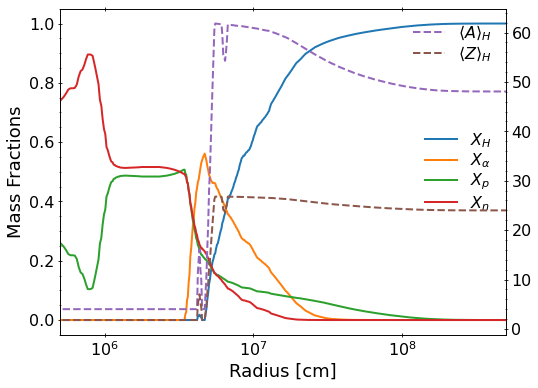

<Figure size 576x432 with 0 Axes>

In [6]:
plt.plot(lastrad,lastxh,label=r"$X_H$")
plt.plot(lastrad,lastxa,label=r"$X_\alpha$")
plt.plot(lastrad,lastxp,label=r"$X_p$")
plt.plot(lastrad,lastxn,label=r"$X_n$")
plt.legend()
plt.xscale('log')
plt.ylabel("Mass Fractions")
plt.xlabel("Radius [cm]")

plt.xlim(0.5e6,0.5e9)

ax2=plt.gca().twinx()

ax2.plot(lastrad,lastabar,'C4--',label=r"$\langle A \rangle_H$")
ax2.plot(lastrad,lastzbar,'C5--',label=r"$\langle Z \rangle_H$")
ax2.legend()

plt.show()
plt.savefig('comps_for_ref.pdf',bbox_inches='tight')